# 0.04 Examine Surrogate Data
#### 09/12/2022, JX
> Please show me data

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR

In [2]:
import pandas as pd

In [3]:
SAVE_PATH = PROCESSED_DIR / 'starling_b1555_amp_envs200sr_MF_IAAFT.pickle'
ae_df = pd.read_pickle(SAVE_PATH)

In [4]:
SAVE_PATH

PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/starling_b1555_amp_envs200sr_MF_IAAFT.pickle')

In [5]:
ae_df = ae_df.reset_index()

In [6]:
ae_df

,index,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,...,waveform,valid_waveform,valid,spectrogram,confusing,is_call,amp_env,h_expo,MF_range,mf_iaaft_range
0,0,508500,566065,24408000,27171120,"[28.88509981238539, 65.14898407709249, 103.180...",9.609107,143.211264,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[-5, -5, -5, -5, -3, -5, -5, -4, -6, -4, -2, -...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[2.4892911824281327e-05, 0.002640440361574292,...","[1.210268876562112, 1.0847868581968103, 0.9997...",0.417653,"[0.328925150116525, 0.3176995526225117, 0.3170..."
1,1,641180,694125,30776640,33318000,"[48.20694858466058, 83.76981436987464, 108.852...",5.388905,156.745806,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, -1, -1, -...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[5.805372893519234e-06, 0.0016227918677031994,...","[1.206747469037927, 1.0668692741274823, 0.9747...",0.461689,"[0.33788529506444487, 0.39047859579810573, 0.3..."
2,2,868940,921030,41709120,44209440,"[2.3001409701376363, 15.027985352733767, 30.17...",8.135380,156.958417,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[-11, -11, -11, -11, -12, -11, -11, -11, -10, ...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[9.765496361069381e-05, 0.007925855927169323, ...","[1.2857270505789482, 1.1416211034999122, 1.035...",0.537401,"[0.45009106028169654, 0.5340258738177576, 0.45..."
3,3,1043035,1093720,50065680,52498560,"[2.9249842953419494, 3.1541257656248125, 14.16...",8.135380,144.054406,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[-2, -2, -1, -2, -2, -2, -3, -3, -3, -3, -3, -...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[5.769828931079246e-05, 0.015915358439087868, ...","[1.317296971969834, 1.1366829235572742, 1.0264...",0.522708,"[0.4183047185177927, 0.41484327079444205, 0.38..."
4,4,1423905,1474480,68347440,70775040,"[3.937345912388517, 3.469701876813218, 2.86553...",4.015413,140.816750,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[6, 5, 5, 5, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, ...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[5.337237780622672e-06, 0.0012986172223463655,...","[1.1679092266897195, 1.0605409985158545, 0.984...",0.388723,"[0.27546980691253753, 0.2819532099802271, 0.29..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,89,1591530,1602065,76393440,76899120,"[4.643018462812651, 2.923919620954338, 13.5363...",2.043606,114.653102,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[-6, -8, -9, -6, -4, -5, -8, -10, -8, -6, -6, ...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[3.023368481080979e-05, 0.0012741615064442158,...","[1.2917844908328622, 1.1501793367891089, 1.021...",0.659497,"[0.7300107720526081, 0.5056109967105382, 0.550..."
1037,123,1605580,1610770,77067840,77316960,"[33.25759392172391, 29.86369699500519, 6.09811...",2.043606,238.422834,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[12, 13, 12, 12, 12, 12, 14, 14, 14, 13, 12, 1...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[7.692791405133903e-05, 0.018301259726285934, ...","[1.7012421954121975, 1.3053615144730153, 1.059...",1.050222,"[0.7744839967363137, 0.8348460520681031, 0.830..."
1038,136,411070,415280,19731360,19933440,"[5.175037749402548, 70.80952142186685, 57.2026...",2.616865,159.078826,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[12, 9, 5, 4, 4, 6, 10, 10, 11, 13, 16, 16, 13...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[1.1144771633553319e-05, 0.002191337989643216,...","[1.5564953817880078, 1.2752443607114707, 1.055...",0.935401,"[0.7049110154208305, 0.6389583926058362, 0.686..."
1039,145,1620240,1623675,77771520,779

## Parse t-statistics

In [7]:
import scipy.stats as stats
import numpy as np

In [8]:
ts = []
p = []
for MF_range, mf_iaaft_range in zip(ae_df['MF_range'].values, ae_df['mf_iaaft_range']):
    test = stats.ttest_1samp(mf_iaaft_range, MF_range)
    ts.append(test[0])
    p.append(test[1])
    
ae_df['ts'] = ts
ae_df['p'] = p

In [9]:
import statsmodels.stats.multitest

In [10]:
bonferroni = statsmodels.stats.multitest.multipletests(ae_df['p'].values, alpha = 0.05, method = 'bonferroni')
ae_df['sig'] = bonferroni[0]
ae_df['bonf_p'] = bonferroni[1]

In [12]:
ae_df

,index,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,...,confusing,is_call,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p
0,0,508500,566065,24408000,27171120,"[28.88509981238539, 65.14898407709249, 103.180...",9.609107,143.211264,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[2.4892911824281327e-05, 0.002640440361574292,...","[1.210268876562112, 1.0847868581968103, 0.9997...",0.417653,"[0.328925150116525, 0.3176995526225117, 0.3170...",-29.109522,4.458907e-24,True,4.641722e-21
1,1,641180,694125,30776640,33318000,"[48.20694858466058, 83.76981436987464, 108.852...",5.388905,156.745806,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[5.805372893519234e-06, 0.0016227918677031994,...","[1.206747469037927, 1.0668692741274823, 0.9747...",0.461689,"[0.33788529506444487, 0.39047859579810573, 0.3...",-22.123395,1.505096e-20,True,1.566805e-17
2,2,868940,921030,41709120,44209440,"[2.3001409701376363, 15.027985352733767, 30.17...",8.135380,156.958417,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[9.765496361069381e-05, 0.007925855927169323, ...","[1.2857270505789482, 1.1416211034999122, 1.035...",0.537401,"[0.45009106028169654, 0.5340258738177576, 0.45...",-9.961302,3.515447e-11,True,3.659581e-08
3,3,1043035,1093720,50065680,52498560,"[2.9249842953419494, 3.1541257656248125, 14.16...",8.135380,144.054406,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[5.769828931079246e-05, 0.015915358439087868, ...","[1.317296971969834, 1.1366829235572742, 1.0264...",0.522708,"[0.4183047185177927, 0.41484327079444205, 0.38...",-31.613224,3.745635e-25,True,3.899206e-22
4,4,1423905,1474480,68347440,70775040,"[3.937345912388517, 3.469701876813218, 2.86553...",4.015413,140.816750,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[5.337237780622672e-06, 0.0012986172223463655,...","[1.1679092266897195, 1.0605409985158545, 0.984...",0.388723,"[0.27546980691253753, 0.2819532099802271, 0.29...",-26.329856,8.900187e-23,True,9.265094e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,89,1591530,1602065,76393440,76899120,"[4.643018462812651, 2.923919620954338, 13.5363...",2.043606,114.653102,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[3.023368481080979e-05, 0.0012741615064442158,...","[1.2917844908328622, 1.1501793367891089, 1.021...",0.659497,"[0.7300107720526081, 0.5056109967105382, 0.550...",-10.128163,2.362279e-11,True,2.459132e-08
1037,123,1605580,1610770,77067840,77316960,"[33.25759392172391, 29.86369699500519, 6.09811...",2.043606,238.422834,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[7.692791405133903e-05, 0.018301259726285934, ...","[1.7012421954121975, 1.3053615144730153, 1.059...",1.050222,"[0.7744839967363137, 0.8348460520681031, 0.830...",-21.000913,6.855604e-20,True,7.136684e-17
1038,136,411070,415280,19731360,19933440,"[5.175037749402548, 70.80952142186685, 57.2026...",2.616865,159.078826,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[1.1144771633553319e-05, 0.002191337989643216,...","[1.5564953817880078, 1.2752443607114707, 1.055...",0.935401,"[0.7049110154208305, 0.6389583926058362, 0.686...",-35.425616,1.204308e-26,True,1.253684e-23
1039,145,1620240,1623675,77771520,77936400,"[26.356576704532092, 27.208591690945624, 8.918...",2.125249,46.728800,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[7.4280251283198595e-06, 0.02198933996260166, ...","[1.3447647895477572, 1.1398819811036296, 1.015...",0.629926,"[0.40105028211875704, 0.4402791524794576, 0.42...",-33.300227,7.816614e-26,True,8.137095e-23


In [11]:
ae_df.columns

Index(['index', 'start_ms', 'end_ms', 'start_sample', 'end_sample', 'p_step',
       'rms_p', 'peak_p', 'bout_check', 'file', 'len_ms', 'syl_in', 'n_syl',
       'peaks_p', 'n_peaks', 'l_p_ratio', 'waveform', 'valid_waveform',
       'valid', 'spectrogram', 'confusing', 'is_call', 'amp_env', 'h_expo',
       'MF_range', 'mf_iaaft_range', 'ts', 'p', 'sig', 'bonf_p'],
      dtype='object')

## t-statistic inquiries

In [12]:
### Out of 10499 bouts, how many are significantly multifractal?
np.unique(ae_df['sig'].values, return_counts = True)

(array([False,  True]), array([   5, 1036]))

<AxesSubplot:xlabel='ts', ylabel='Density'>

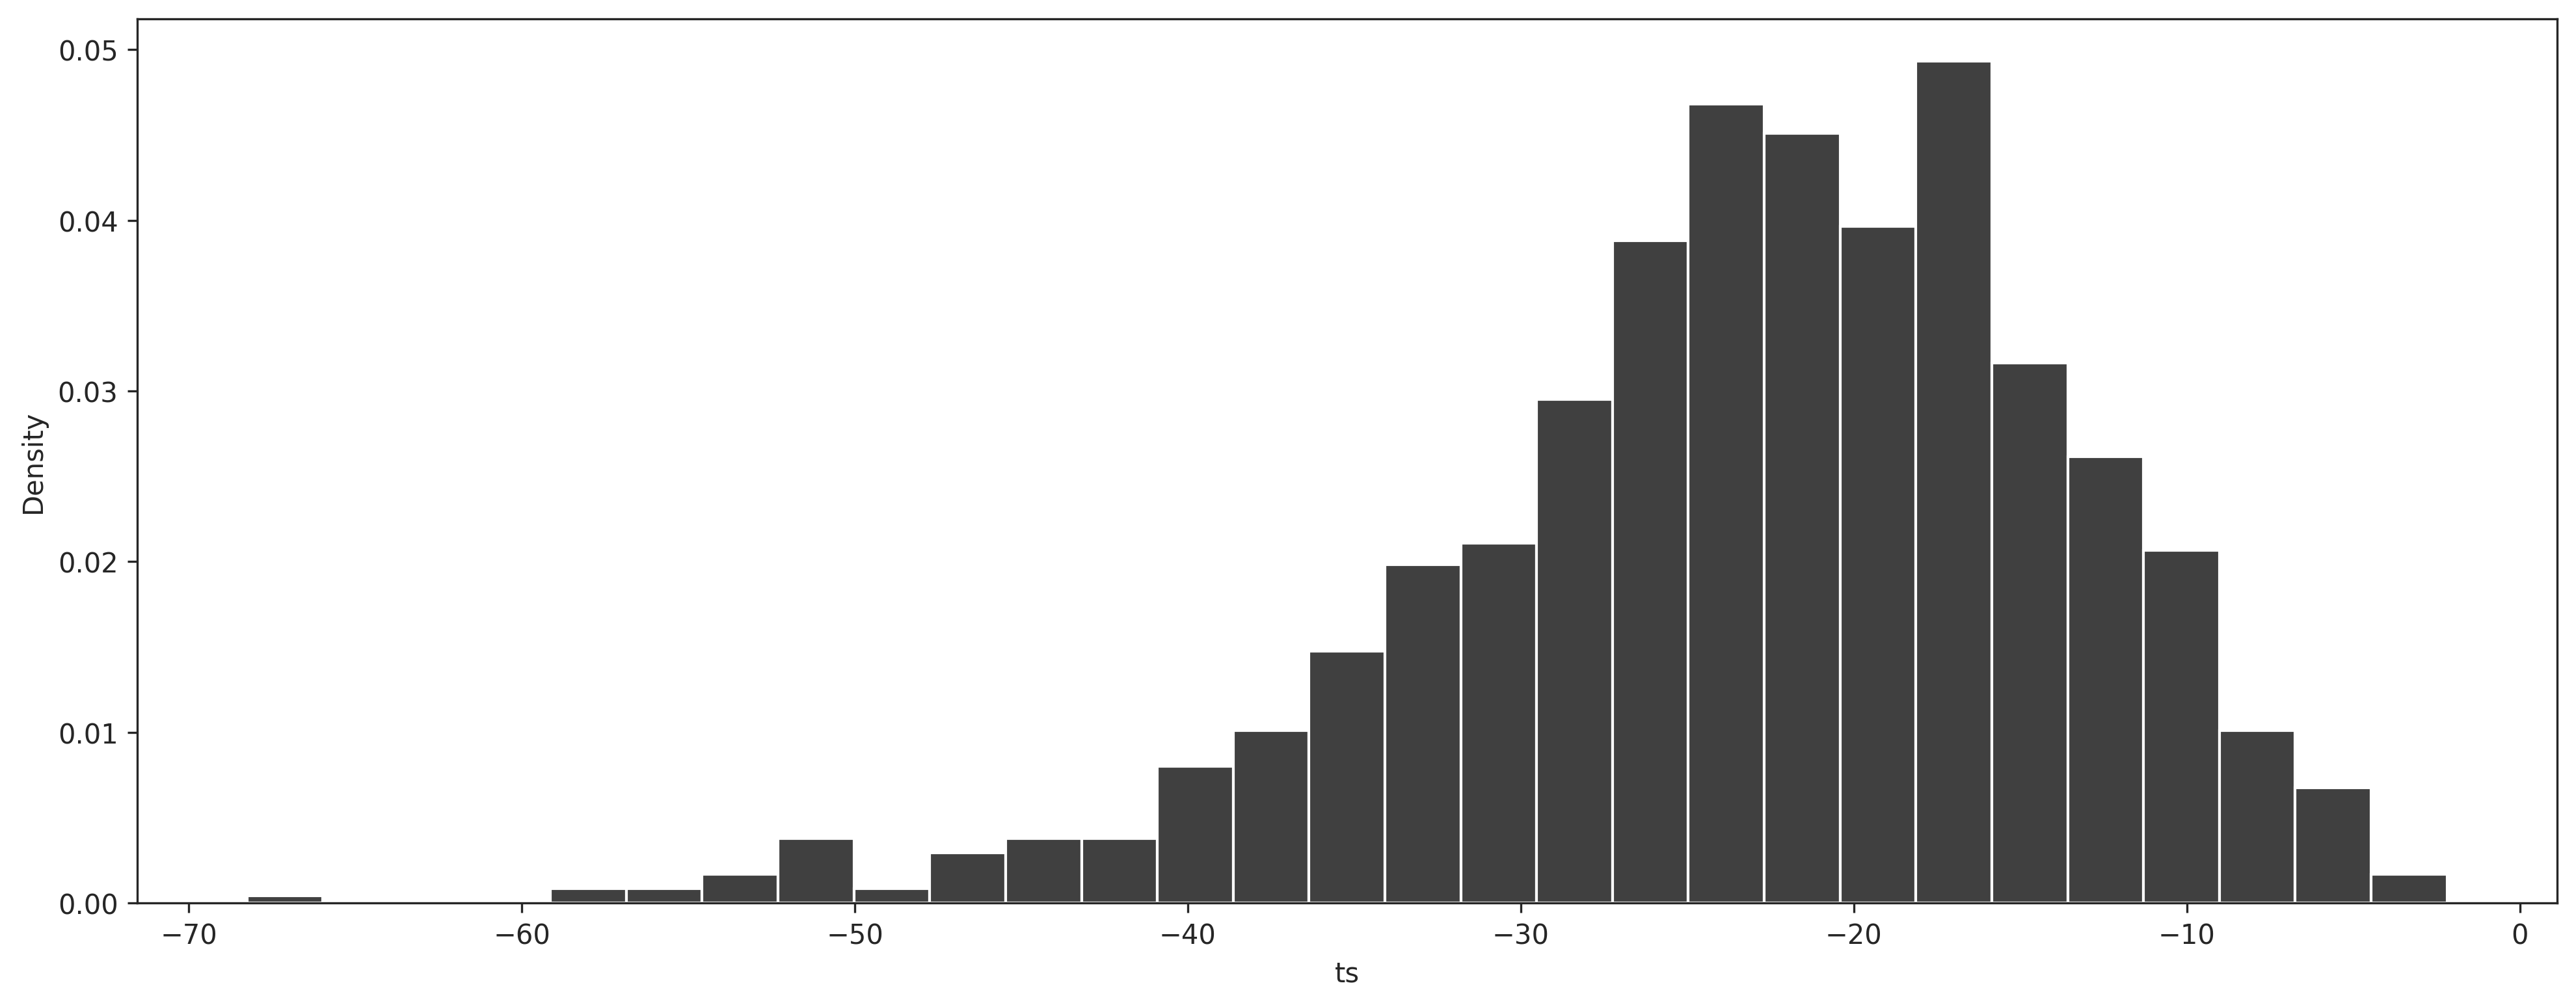

In [13]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

sns.histplot(data = ae_df, x = 'ts', stat = 'density', color = 'black', fill = 'black')

## Is t correlated with mf-range?

<AxesSubplot:xlabel='MF_range', ylabel='ts'>

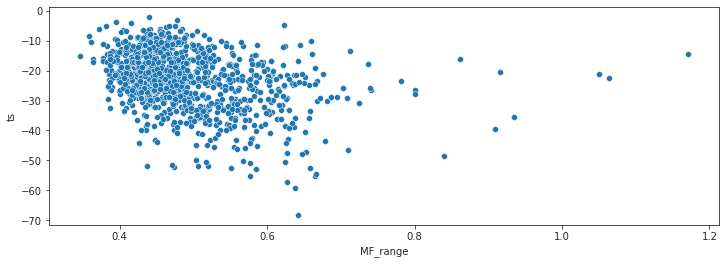

In [54]:
plt.figure(figsize = (12, 4))
sns.scatterplot(data = ae_df, x = 'MF_range', y = 'ts')

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [65]:
mod = ols("ts~MF_range", data = ae_df).fit()

In [66]:
table = sm.stats.anova_lm(mod, typ = 2)

In [67]:
table

,sum_sq,df,F,PR(>F)
MF_range,9511.519515,1.0,116.986468,6.533262e-26
Residual,84475.315455,1039.0,NaN,NaN


In [78]:
from scipy.stats import pearsonr

In [79]:
pearsonr(ae_df.MF_range.values, ae_df.ts.values)

PearsonRResult(statistic=-0.3181203409294907, pvalue=6.533262214406816e-26)

## Length

<AxesSubplot:xlabel='len_ms', ylabel='ts'>

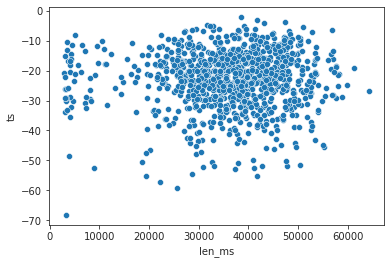

In [14]:
sns.scatterplot(data = ae_df, x = 'len_ms', y = 'ts')

In [15]:
ae_50 = ae_df

In [16]:
ae_50 = ae_50[(ae_50['len_ms'] > 45000) & (ae_50['len_ms'] < 55000)]

In [17]:
ae_50.sort_values('ts')

,index,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,...,confusing,is_call,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p
16,16,1054730,1102565,50627040,52923120,"[39.715496832493514, 72.70744599352966, 54.086...",7.246241,129.562644,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[1.5599114703945816e-05, 0.0025020132306963205...","[1.2327352557284037, 1.0805630934564168, 0.979...",0.506367,"[0.37342890067543255, 0.3572100331919993, 0.33...",-51.807811,1.115966e-31,True,1.161720e-28
123,9,764570,814955,36699360,39117840,"[24.960976552288585, 72.19439916739682, 61.506...",6.920598,160.455414,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[5.1855851779691875e-05, 0.008276320993900299,...","[1.2294080836235406, 1.0925499890943722, 0.999...",0.471153,"[0.3405695392990743, 0.318217418842326, 0.3492...",-51.376061,1.442316e-31,True,1.501451e-28
691,19,1688695,1736285,81057360,83341680,"[1.964143257297472, 1.8487666903905637, 2.1371...",7.163229,157.472923,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[0.00011266119690844789, 0.03566310554742813, ...","[1.2918584251254963, 1.123327752408667, 1.0056...",0.566956,"[0.40984082249016973, 0.4201600993257256, 0.40...",-50.321025,2.723967e-31,True,2.835649e-28
464,27,1436340,1481585,68944320,71116080,"[3.414169265025856, 5.809585680338041, 6.03847...",9.048385,146.452700,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[3.6190087939758087e-06, 0.0036649855319410563...","[1.3173545479987818, 1.1391468908300564, 1.025...",0.558816,"[0.40034320742039264, 0.4284569293087872, 0.39...",-46.255878,3.587489e-30,True,3.734576e-27
772,5,216775,266350,10405200,12784800,"[23.250089121974142, 50.78166418736854, 80.548...",4.887436,139.759245,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[4.064019321958767e-06, 0.001540783909149468, ...","[1.2780455722568562, 1.1081470941508744, 0.999...",0.554725,"[0.36637756520830567, 0.4144757249293952, 0.39...",-45.503058,5.923763e-30,True,6.166637e-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,18,816870,865340,39209760,41536320,"[5.456512453783949, 11.954165963694372, 23.262...",9.611665,128.665509,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[4.365203858469613e-05, 0.007864967919886112, ...","[1.2243620494072338, 1.107333930507414, 1.0260...",0.441428,"[0.4027594204165108, 0.321333998586143, 0.3251...",-7.837852,7.601823e-09,True,7.913498e-06
570,3,1287260,1340015,61788480,64320720,"[8.016072572067449, 17.5739840966748, 23.77729...",9.201362,147.303926,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[1.943447205121629e-05, 0.0011705666547641158,...","[1.2159731018185178, 1.087327007297226, 0.9990...",0.457544,"[0.38986820954607737, 0.3480344060651236, 0.34...",-6.960840,8.250008e-08,True,8.588258e-05
127,13,1280475,1328620,61462800,63773760,"[28.386039538253655, 62.16879061368105, 56.147...",6.456710,139.981862,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[0.00010926996765192598, 0.0042352573946118355...","[1.2533901680452617, 1.1118808024796274, 1.010...",0.504674,"[0.4195355375949622, 0.4336089657503387, 0.380...",-6.885545,1.016374e-07,True,1.058046e-04
261,12,948005,998975,45504240,47950800,"[2.4463048755395667, 5.419520670520434, 6.5245...",9.128669,171.398957,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[1.8602306226966903e-05, 0.0029174110386520624...","[1.2543230143660073, 1.1406599419142827, 1.051...",0.462970,"[0.3501010779689343, 0.3233316591975409, 0.443...",-5.412318,6.583351e-06,True,6.853268e-03


In [18]:
ae_50_high = ae_50.sort_values('ts')[0:3]
ae_50_low = ae_50.sort_values('ts', ascending = False)[0:3]

In [19]:
ae_50_low

,index,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,...,confusing,is_call,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p
265,16,1385395,1432815,66498960,68775120,"[2.732574980436498, 4.650788541614781, 3.76560...",8.111573,131.920811,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[2.554635466367472e-05, 0.00295591470785439, 0...","[1.2127883319459447, 1.101351019012197, 1.0245...",0.394504,"[0.31381141448510763, 0.41036056859999714, 0.4...",-3.648460,9.601147e-04,False,0.999479
261,12,948005,998975,45504240,47950800,"[2.4463048755395667, 5.419520670520434, 6.5245...",9.128669,171.398957,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[1.8602306226966903e-05, 0.0029174110386520624...","[1.2543230143660073, 1.1406599419142827, 1.051...",0.462970,"[0.3501010779689343, 0.3233316591975409, 0.443...",-5.412318,6.583351e-06,True,0.006853
127,13,1280475,1328620,61462800,63773760,"[28.386039538253655, 62.16879061368105, 56.147...",6.456710,139.981862,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[0.00010926996765192598, 0.0042352573946118355...","[1.2533901680452617, 1.1118808024796274, 1.010...",0.504674,"[0.4195355375949622, 0.4336089657503387, 0.380...",-6.885545,1.016374e-07,True,0.000106


## try to examine variation over days

In [20]:
ae_df = ae_df.sort_values(by = 'file')

In [21]:
ae_df

,index,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,...,confusing,is_call,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p
433,152,843395,847050,40482960,40658400,"[14.683919215836996, 12.046542465573031, 5.347...",2.053480,14.683919,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[1.8811271047525224e-06, 0.001598596340045333,...","[1.4317280663375895, 1.2998360267119562, 1.214...",0.434743,"[0.35380340149392886, 0.32222571724729465, 0.3...",-16.746592,4.392417e-17,True,4.572506e-14
436,179,115750,118750,5556000,5700000,"[22.824395198097683, 27.58286867894334, 18.927...",2.053480,27.582869,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[0.00011242810433031991, 0.047508034855127335,...","[1.3176989746089498, 1.1797172061374954, 1.088...",0.480719,"[0.3390455354840559, 0.3222051675600849, 0.369...",-20.919951,7.668755e-20,True,7.983174e-17
393,44,1602030,1637260,76897440,78588480,"[4.842874306314124, 16.958959993359283, 15.386...",4.193686,156.400280,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[2.9498012281692354e-06, 0.0002454215427860617...","[1.2411989051465895, 1.1056589515151478, 1.018...",0.426926,"[0.295582141048662, 0.3082763914026643, 0.2897...",-26.633314,6.330745e-23,True,6.590306e-20
372,23,1238880,1280705,59466240,61473840,"[57.59336342805646, 82.82025985600444, 60.1760...",4.193686,161.219653,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[1.5472758605028503e-05, 0.005191642325371504,...","[1.2386846918716494, 1.0823614548884717, 0.977...",0.514182,"[0.3867127619225422, 0.39173017203997096, 0.36...",-32.190589,2.171936e-25,True,2.260985e-22
426,77,135995,161160,6527760,7735680,"[1.3235568745699353, 3.4764030774515704, 4.143...",4.648036,127.754843,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[1.6414969650213607e-05, 0.0037759311962872744...","[1.243522672894852, 1.0622462996799327, 0.9280...",0.638478,"[0.4753364255967907, 0.41839021538467014, 0.42...",-35.976526,7.546848e-27,True,7.856269e-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,117,1626245,1653460,78059760,79366080,"[4.6420012779760915, 3.5578962610884433, 6.411...",8.842955,154.505897,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[3.176002428517677e-05, 0.009926088154315948, ...","[1.3049593996088624, 1.1670648951844607, 1.063...",0.495614,"[0.35104825823528474, 0.3556404010365558, 0.34...",-21.694504,2.664522e-20,True,2.773768e-17
208,94,571405,604365,27427440,29009520,"[3.186041276785073, 9.179965721809026, 29.2333...",8.842955,162.128224,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[0.00011884070408996195, 0.01884525828063488, ...","[1.2564546583521294, 1.1288417460368927, 1.035...",0.461396,"[0.3289524799245347, 0.33369857339562325, 0.34...",-22.685649,7.223474e-21,True,7.519636e-18
187,73,122715,160535,5890320,7705680,"[58.48762509639229, 99.6364192335844, 81.84661...",8.842955,148.230088,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[2.344405402254779e-05, 0.004122103098779917, ...","[1.2971192856647167, 1.1016525241167963, 0.976...",0.576485,"[0.3970455661384287, 0.4222831992668754, 0.397...",-44.318095,1.326253e-29,True,1.380629e-26
194,80,844145,879595,40518960,42220560,"[93.31956668172838, 103.17816015065412, 95.642...",3.635586,120.685181,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[1.669497214606963e-05, 0.003661444643512368, ...","[1.2573475596550814, 1.0880702593271079, 0.975...",0.540041,"[0.431877445695766, 0.3942537610743734, 0.3881...",-33.117696,9.226911e-26,True,9.605214e-23


In [22]:
ae_df['file'].values[2].split('/')

['',
 'mnt',
 'sphere',
 'speech_bci',
 'raw_data',
 's_b1555_22',
 '2022-09-20',
 'alsa',
 '08-00-01-02.wav']

In [23]:
date = []
hour = []
for filename in ae_df['file'].values:
    ## extract date
    date.append(filename.split('/')[-3])
    ## extract hour
    hour.append(filename.split('/')[-1].split('-')[0])

In [24]:
ae_df['date'] = date
ae_df['hour'] = hour

In [25]:
ae_df

,index,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,...,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p,date,hour
433,152,843395,847050,40482960,40658400,"[14.683919215836996, 12.046542465573031, 5.347...",2.053480,14.683919,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[1.8811271047525224e-06, 0.001598596340045333,...","[1.4317280663375895, 1.2998360267119562, 1.214...",0.434743,"[0.35380340149392886, 0.32222571724729465, 0.3...",-16.746592,4.392417e-17,True,4.572506e-14,2022-09-20,08
436,179,115750,118750,5556000,5700000,"[22.824395198097683, 27.58286867894334, 18.927...",2.053480,27.582869,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.00011242810433031991, 0.047508034855127335,...","[1.3176989746089498, 1.1797172061374954, 1.088...",0.480719,"[0.3390455354840559, 0.3222051675600849, 0.369...",-20.919951,7.668755e-20,True,7.983174e-17,2022-09-20,08
393,44,1602030,1637260,76897440,78588480,"[4.842874306314124, 16.958959993359283, 15.386...",4.193686,156.400280,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[2.9498012281692354e-06, 0.0002454215427860617...","[1.2411989051465895, 1.1056589515151478, 1.018...",0.426926,"[0.295582141048662, 0.3082763914026643, 0.2897...",-26.633314,6.330745e-23,True,6.590306e-20,2022-09-20,08
372,23,1238880,1280705,59466240,61473840,"[57.59336342805646, 82.82025985600444, 60.1760...",4.193686,161.219653,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[1.5472758605028503e-05, 0.005191642325371504,...","[1.2386846918716494, 1.0823614548884717, 0.977...",0.514182,"[0.3867127619225422, 0.39173017203997096, 0.36...",-32.190589,2.171936e-25,True,2.260985e-22,2022-09-20,08
426,77,135995,161160,6527760,7735680,"[1.3235568745699353, 3.4764030774515704, 4.143...",4.648036,127.754843,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[1.6414969650213607e-05, 0.0037759311962872744...","[1.243522672894852, 1.0622462996799327, 0.9280...",0.638478,"[0.4753364255967907, 0.41839021538467014, 0.42...",-35.976526,7.546848e-27,True,7.856269e-24,2022-09-20,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,117,1626245,1653460,78059760,79366080,"[4.6420012779760915, 3.5578962610884433, 6.411...",8.842955,154.505897,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[3.176002428517677e-05, 0.009926088154315948, ...","[1.3049593996088624, 1.1670648951844607, 1.063...",0.495614,"[0.35104825823528474, 0.3556404010365558, 0.34...",-21.694504,2.664522e-20,True,2.773768e-17,2022-09-29,21
208,94,571405,604365,27427440,29009520,"[3.186041276785073, 9.179965721809026, 29.2333...",8.842955,162.128224,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.00011884070408996195, 0.01884525828063488, ...","[1.2564546583521294, 1.1288417460368927, 1.035...",0.461396,"[0.3289524799245347, 0.33369857339562325, 0.34...",-22.685649,7.223474e-21,True,7.519636e-18,2022-09-29,21
187,73,122715,160535,5890320,7705680,"[58.48762509639229, 99.6364192335844, 81.84661...",8.842955,148.230088,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[2.344405402254779e-05, 0.004122103098779917, ...","[1.2971192856647167, 1.1016525241167963, 0.976...",0.576485,"[0.3970455661384287, 0.4222831992668754, 0.397...",-44.318095,1.326253e-29,True,1.380629e-26,2022-09-29,21
194,80,844145,879595,40518960,42220560,"[93.31956668172838, 103.17816015065412, 95.642...",3.635586,120.685181,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[1.669497214606963e-05, 0.003661444643512368, ...","[1.2573475596550814, 1.0880702593271079, 0.975...",0.540041,"[0.431877445695766, 0.3942537610743734, 0.3881...",-33.117696,9.226911e-26,True,9.605214e-23,2022-09-29,21


<AxesSubplot:xlabel='ts', ylabel='Density'>

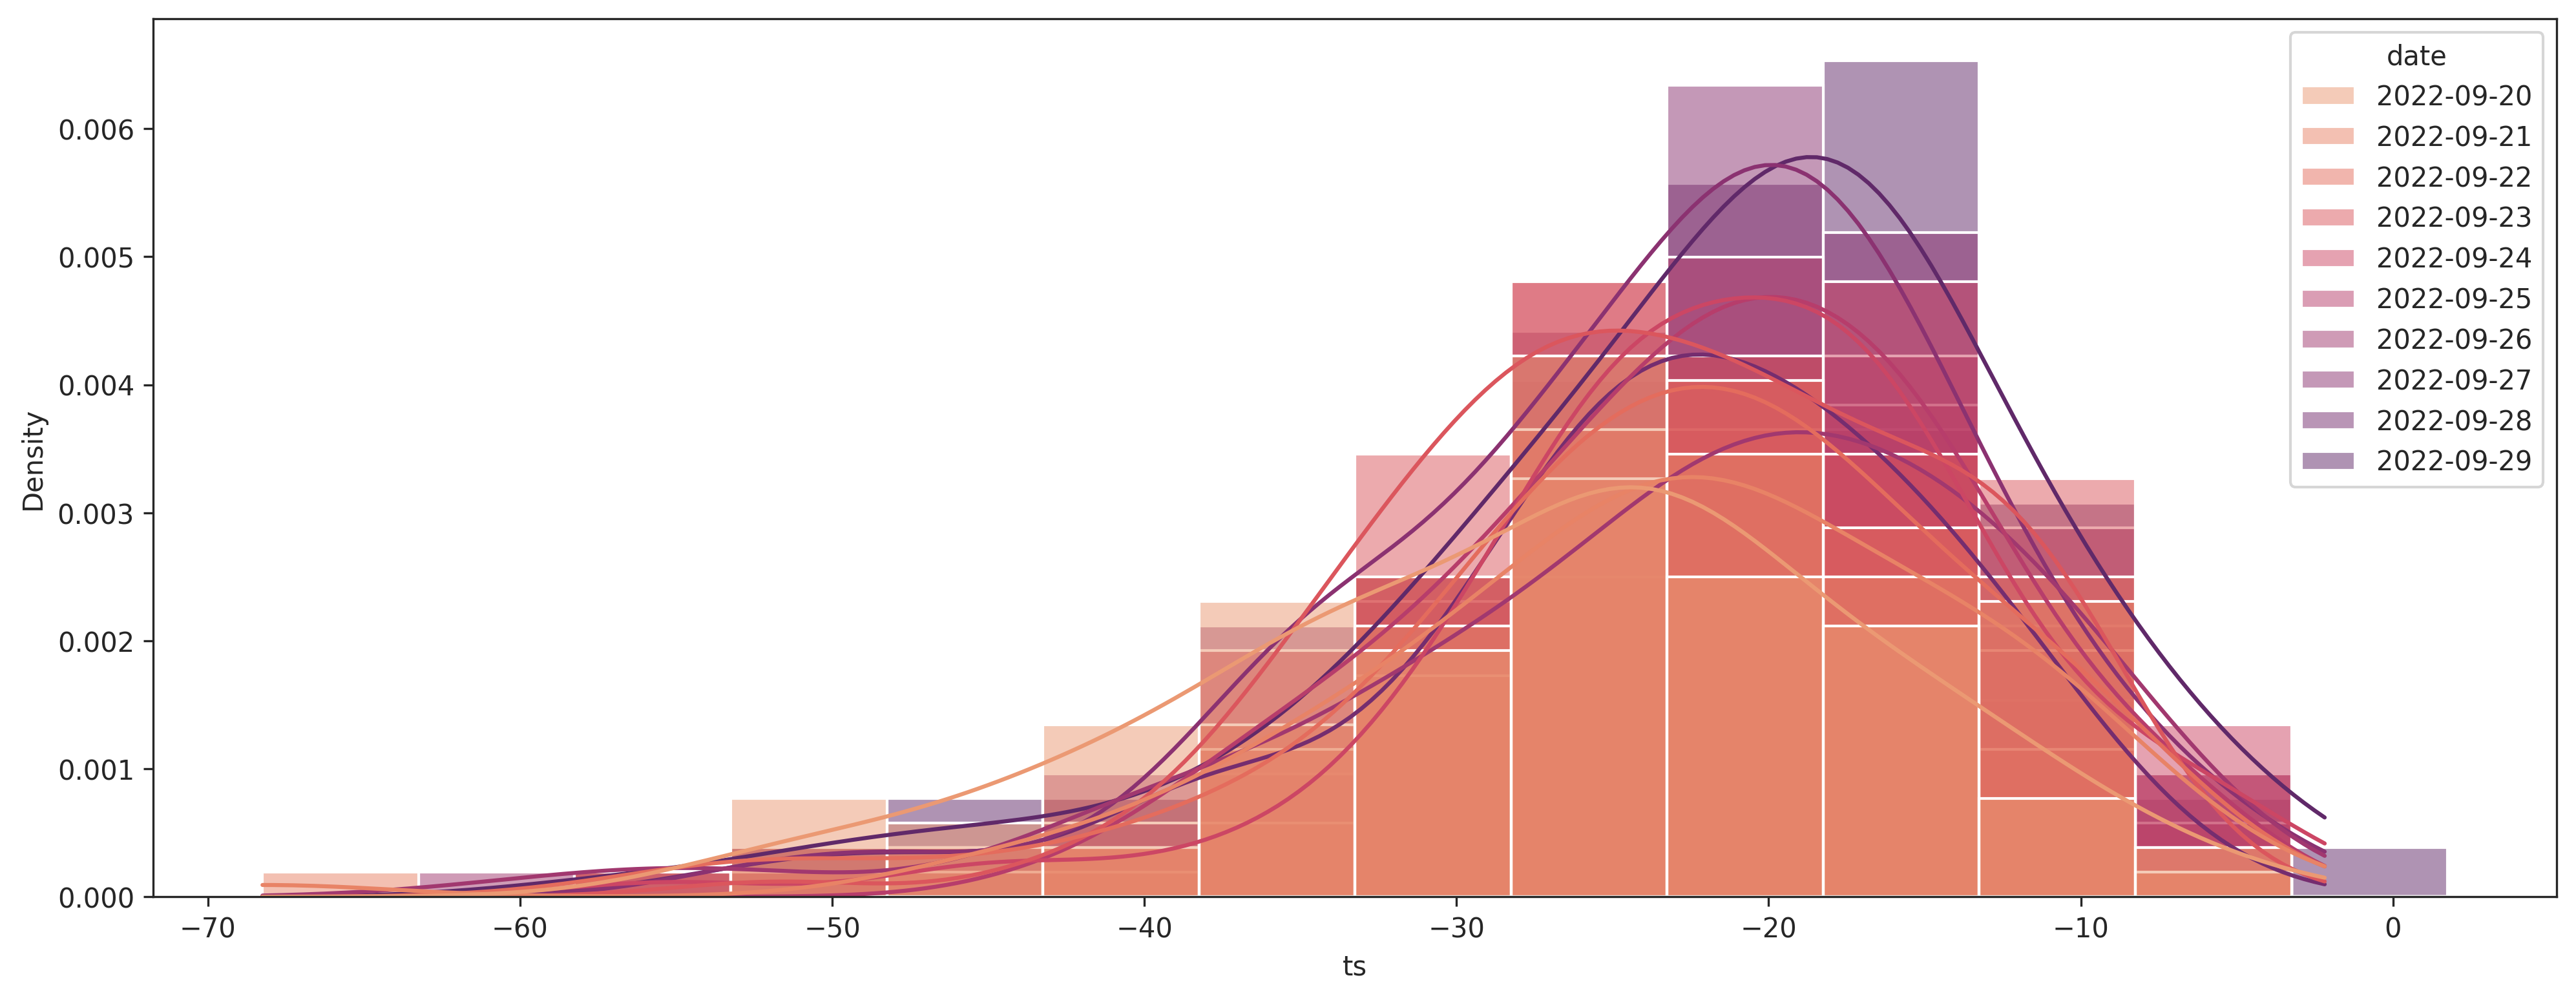

In [41]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

sns.histplot(data = ae_df, x = 'ts', stat = 'density', hue = 'date', binwidth = 5, kde = True, palette="flare")

<AxesSubplot:xlabel='date', ylabel='ts'>

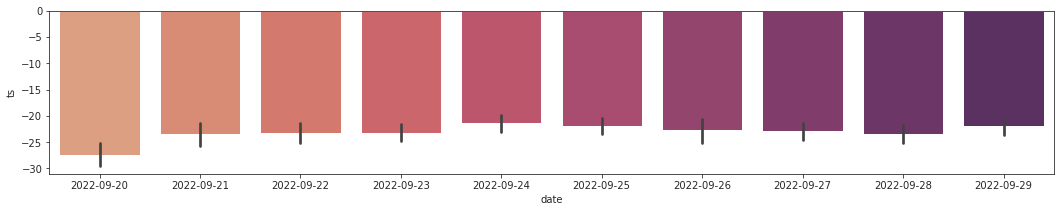

In [47]:
plt.figure(figsize = (18, 3))
sns.barplot(data = ae_df, x = 'date', y = 'ts', palette="flare")

## hour?

<AxesSubplot:xlabel='ts', ylabel='Density'>

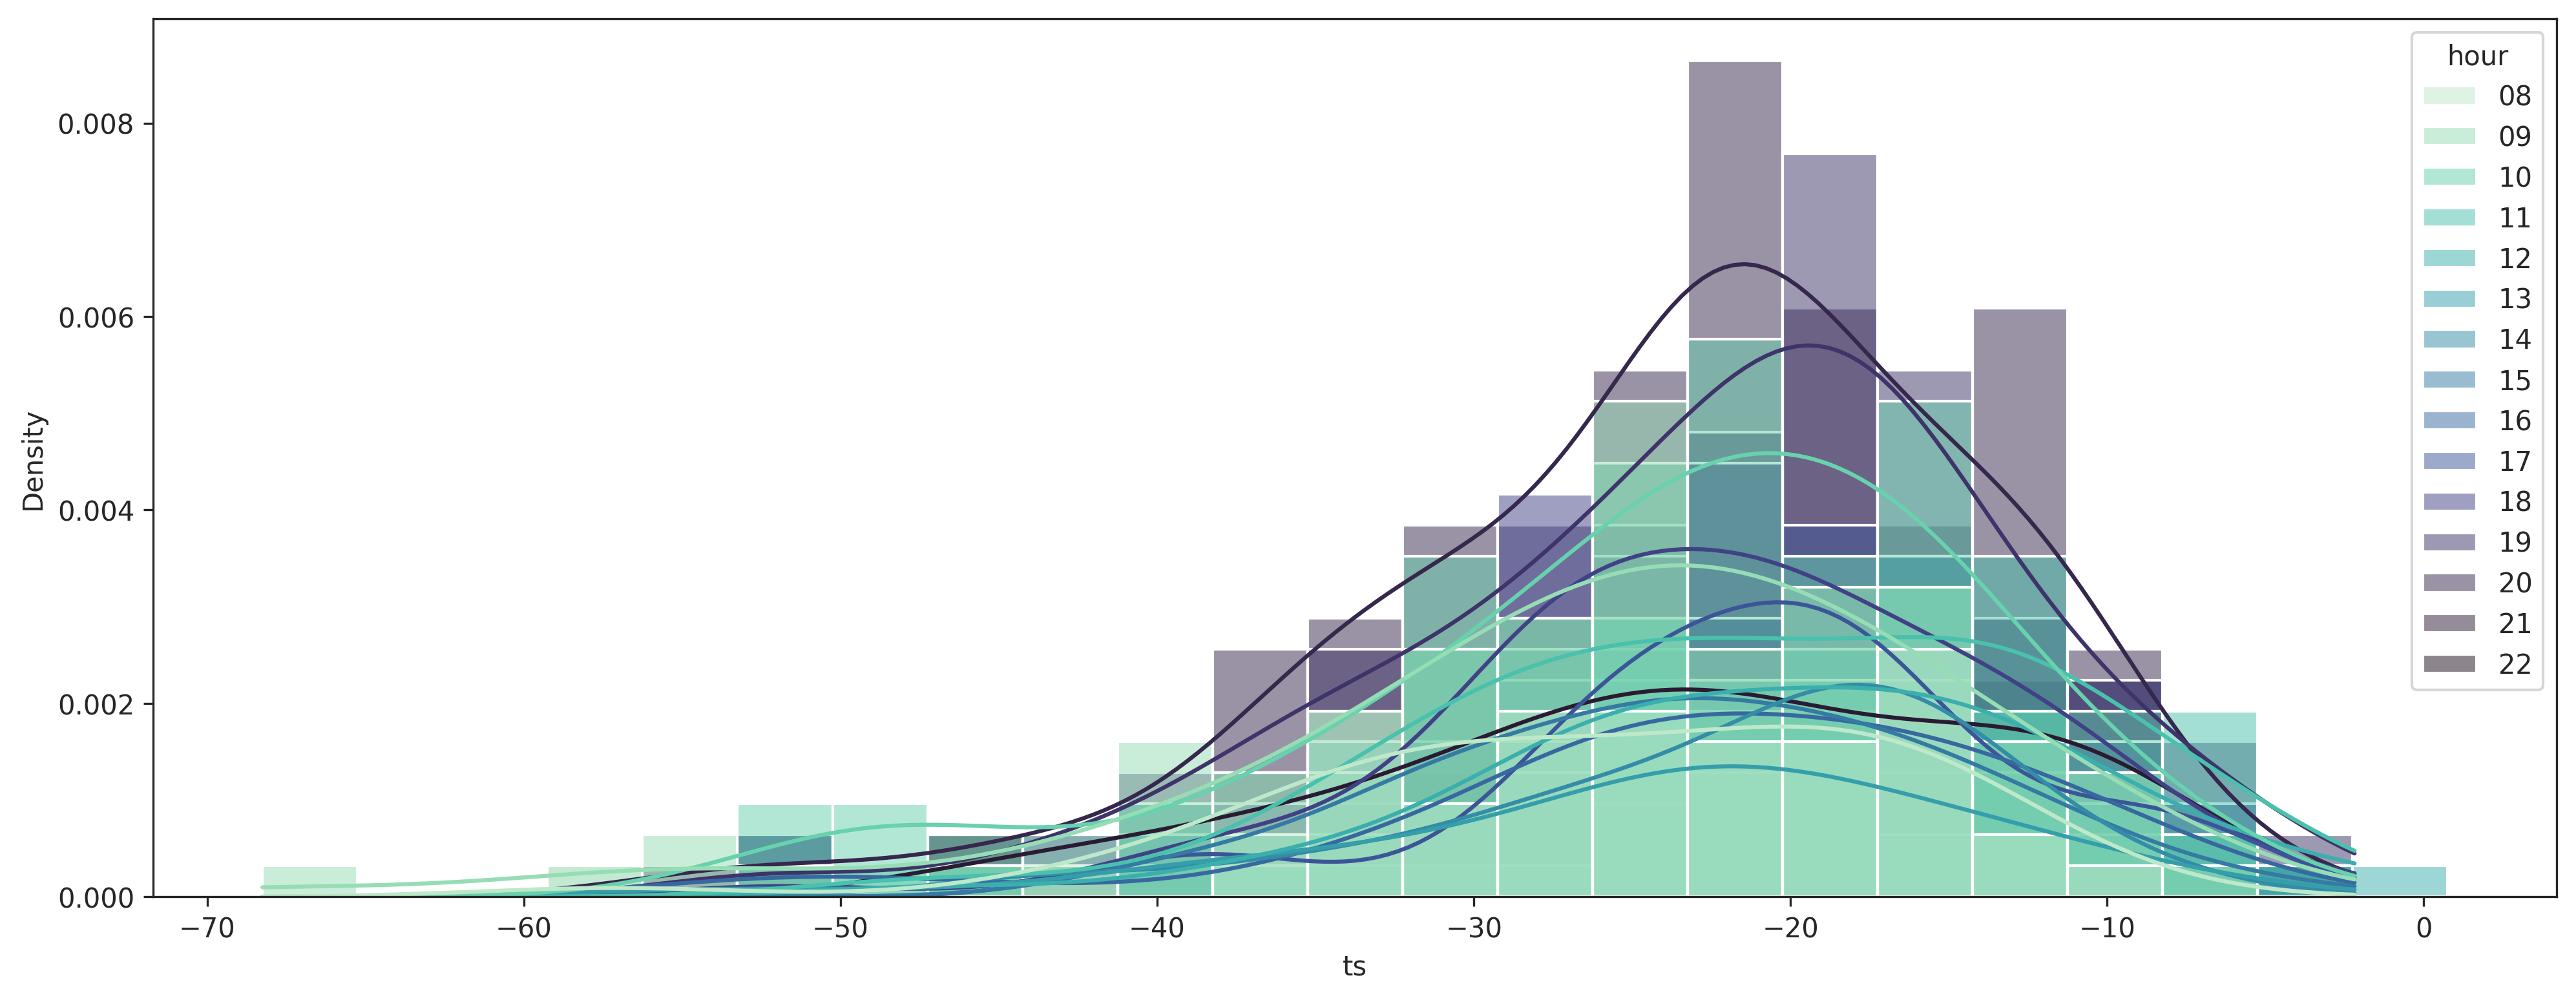

In [48]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

sns.histplot(data = ae_df, x = 'ts', stat = 'density', hue = 'hour', binwidth = 3, kde = True, palette = 'mako_r')

<AxesSubplot:xlabel='hour', ylabel='ts'>

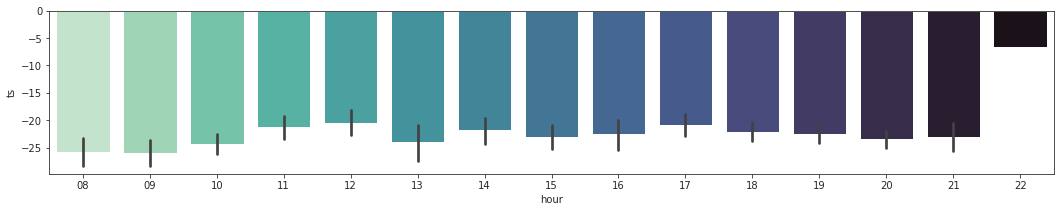

In [50]:
plt.figure(figsize = (18, 3))
sns.barplot(data = ae_df, x = 'hour', y = 'ts', palette="mako_r")

In [29]:
dt = []
hr = []
hour_dist = []
for date in np.unique(ae_df['date'].values):
    for hour in np.unique(ae_df['hour'].values):
        dt.append(date)
        hr.append(hour)
        hour_dist.append(np.mean(ae_df[ae_df['date'] == date][ae_df['hour'] == hour].ts))
    
hour_dist

/tmp/ipykernel_42215/1487885030.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_dist.append(np.mean(ae_df[ae_df['date'] == date][ae_df['hour'] == hour].ts))


[-24.122611305370974,
 -28.16183015849793,
 -27.235229109117622,
 -27.1320880882867,
 -33.252796558030866,
 -29.328821036563856,
 -31.707602943004904,
 -27.66596855529642,
 -26.543031257150012,
 -21.101416440629716,
 -24.200541318472126,
 -30.483442954381108,
 -25.769019665531395,
 -24.848373033319028,
 nan,
 nan,
 -27.804509624144522,
 -26.490222094410452,
 -26.913023525134278,
 -27.64539214565846,
 -26.232305954418553,
 -15.564538112553134,
 nan,
 nan,
 -19.6028923992781,
 -21.180695008017967,
 -21.22441221055557,
 -23.31904508348221,
 -10.083468256458268,
 nan,
 -26.638720240466522,
 -25.643791595913566,
 -28.054314517429553,
 -17.50396146824037,
 -25.141029566744493,
 -22.16098012641684,
 -29.10818199730147,
 -23.915971173455326,
 -30.475146883899363,
 -19.458851798528784,
 -20.000078451314316,
 -27.632022043185042,
 -25.62076921430058,
 -22.125746066976728,
 nan,
 -26.69838869861833,
 -24.489146838240725,
 -22.554756824831973,
 -17.18379652412883,
 -22.233641556262466,
 nan,
 -21.

In [30]:
df = pd.DataFrame(
    {
        "dt": dt,
        "hr": hr,
        "hour_dist": hour_dist
    }
)

In [31]:
df

,dt,hr,hour_dist
0,2022-09-20,08,-24.122611
1,2022-09-20,09,-28.161830
2,2022-09-20,10,-27.235229
3,2022-09-20,11,-27.132088
4,2022-09-20,12,-33.252797
...,...,...,...
145,2022-09-29,18,-17.633066
146,2022-09-29,19,-23.482363
147,2022-09-29,20,-22.649321
148,2022-09-29,21,-25.125834


<AxesSubplot:xlabel='hr', ylabel='hour_dist'>

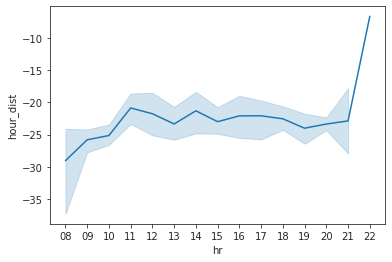

In [40]:
sns.lineplot(data = df, x = 'hr', y = 'hour_dist', palette="flare")

<AxesSubplot:xlabel='hr', ylabel='hour_dist'>

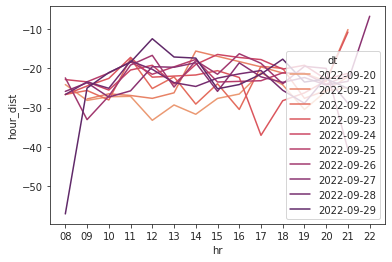

In [39]:
sns.lineplot(data = df, x = 'hr', y = 'hour_dist', hue = 'dt', palette="flare")

## Pickle dataframe

In [34]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir

In [35]:
SAVE_PATH = PROCESSED_DIR / 'b1555' /'b1555_lowMF.pickle'
ensure_dir(SAVE_PATH)

In [36]:
ae_50_low.to_pickle(SAVE_PATH)

In [37]:
SAVE_PATH = PROCESSED_DIR / 'b1555' /'b1555_highMF.pickle'
ensure_dir(SAVE_PATH)

In [38]:
ae_50_high.to_pickle(SAVE_PATH)